#**Prodigy InfoTech Task 1**

In [ ]:
import numpy as np
import pandas as pd

**Data Loading and Initial Inspection**

Loading the training dataset from a CSV file and inspecting its structure to identify any missing values.

In [ ]:
# Load the train CSV file into pandas DataFrame
house_data = pd.read_csv('/content/train.csv')

**Handling Missing Values**

Identifying columns with null values and determining the extent of missing data.

In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Show only columns with null values**

The columns that I will be using does not contain nulls.

In [ ]:
null_counts = house_data.isnull().sum()
null_counts[null_counts > 0]

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


**Visualizing Sale Price Distribution**

Creating a boxplot to visualize the distribution and detect outliers in the "SalePrice" column.

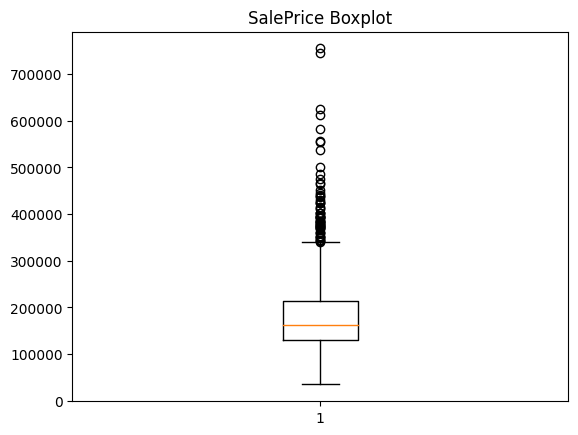

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(house_data['SalePrice'])
plt.title('SalePrice Boxplot')
plt.show()

**Removing Sales Outliers**

Applying the Interquartile Range (IQR) method to filter out extreme outliers from the "SalePrice" data.

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for SalePrice
Q1 = house_data['SalePrice'].quantile(0.25)
Q3 = house_data['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Filter out outliers
house_data_filtered = house_data[(house_data['SalePrice'] >= lower_bound) & (house_data['SalePrice'] <= upper_bound)]

# Check the number of removed outliers
print(f"Original dataset size: {house_data.shape[0]}")
print(f"Filtered dataset size: {house_data_filtered.shape[0]}")
print(f"Number of outliers removed: {house_data.shape[0] - house_data_filtered.shape[0]}")

Lower Bound: 3937.5
Upper Bound: 340037.5
Original dataset size: 1460
Filtered dataset size: 1399
Number of outliers removed: 61


**There are still some outliers but there is no extram ones.**

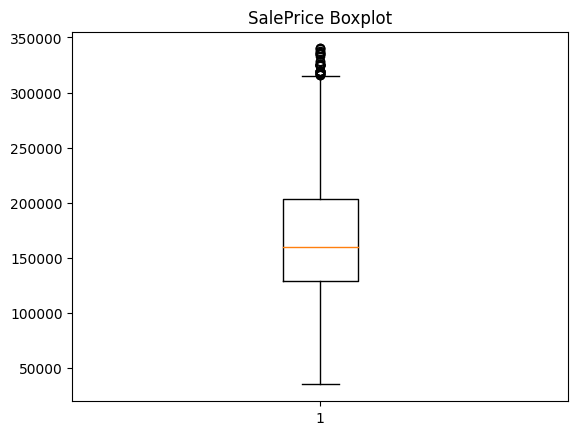

In [ ]:
plt.boxplot(house_data_filtered['SalePrice'])
plt.title('SalePrice Boxplot')
plt.show()

**This is the task:**

**"Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms."**


**Creating New Features: Total Area and Total Bathrooms**

Combining multiple features to create new attributes "Total_Area" and "Total_Bathrooms" for the model.

In [ ]:
house_data_filtered['Total_Area'] = (house_data_filtered['TotalBsmtSF'] + house_data_filtered['1stFlrSF'] +
                             house_data_filtered['2ndFlrSF'] + house_data_filtered['LowQualFinSF'] + house_data_filtered['GrLivArea']+
                             house_data_filtered['GarageArea']+ house_data_filtered['LotArea']+house_data_filtered['PoolArea'])

In [ ]:

house_data_filtered['Total_Bathrooms'] = (house_data_filtered['BsmtFullBath'] + house_data_filtered['FullBath'] +
                           (house_data_filtered['BsmtHalfBath'] + house_data_filtered['HalfBath']))

**Features to be used in the first try.**

In [ ]:
X = house_data_filtered[['Total_Area', 'Total_Bathrooms', 'BedroomAbvGr']]
y = house_data_filtered['SalePrice']

In [ ]:
X

,Total_Area,Total_Bathrooms,BedroomAbvGr
0,13274,4,3
1,13846,3,3
2,16350,4,3
3,14382,2,3
4,20637,4,4
...,...,...,...
1455,12624,3,3
1456,19363,3,3
1457,15126,2,4
1458,13191,2,2


In [ ]:
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


**Splitting the Dataset into Training and Testing Sets**

Dividing the filtered dataset into training and testing sets for model evaluation.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=0)

**Feature Scaling**

Applying standardization to the features to ensure they are on a similar scale.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-0.083978  , -0.3914907 ,  0.18740785],
       [-0.46760983, -0.3914907 , -1.08092011],
       [-0.19362063, -0.3914907 ,  0.18740785],
       ...,
       [ 0.10490315, -0.3914907 , -1.08092011],
       [-0.19127283, -0.3914907 , -1.08092011],
       [-0.24210287, -0.3914907 ,  1.4557358 ]])

In [ ]:
X_test

array([[-0.04113051,  0.74296716,  1.4557358 ],
       [-0.81907668, -1.52594856, -1.08092011],
       [-0.43837962,  0.74296716, -1.08092011],
       ...,
       [-0.85241555, -0.3914907 , -2.34924806],
       [-0.20254231, -0.3914907 ,  0.18740785],
       [-0.38661045, -0.3914907 , -1.08092011]])

**Training the Linear Regression Model**

Fitting a linear regression model to the training data to predict house prices.

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

**Predicting House Prices Using the Linear Regression Model**

Using the trained model to make predictions on the test set.

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
comparison_df = pd.DataFrame({'Actual':Y_test,'Predicted': y_pred})

random_samples = comparison_df.sample(3)
print(random_samples)

      Actual      Predicted
519   234000  159114.482044
241   110500  103824.368968
1111  205000  196870.667020


**Sale_Price=WX+b**

**Where:**

W = [13241.51  32030.35 2273.37]

X is the input parameters

b = 168161.72


In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[13241.51096327 32030.34692855  2273.36767088]
168161.71591992374


**Evaluation of the Model's Performance**

Calculating evaluation metrics (MSE, RMSE, MAE, R²) to assess the model's accuracy.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 2378312161.770702
Root Mean Squared Error (RMSE): 48767.94194725365
Mean Absolute Error (MAE): 35936.12303588575
R² Score: 0.3670926238747205


**Plotting Actual vs. Predicted House Prices**

Visualizing the model's performance by comparing the actual sale prices with the predicted values.

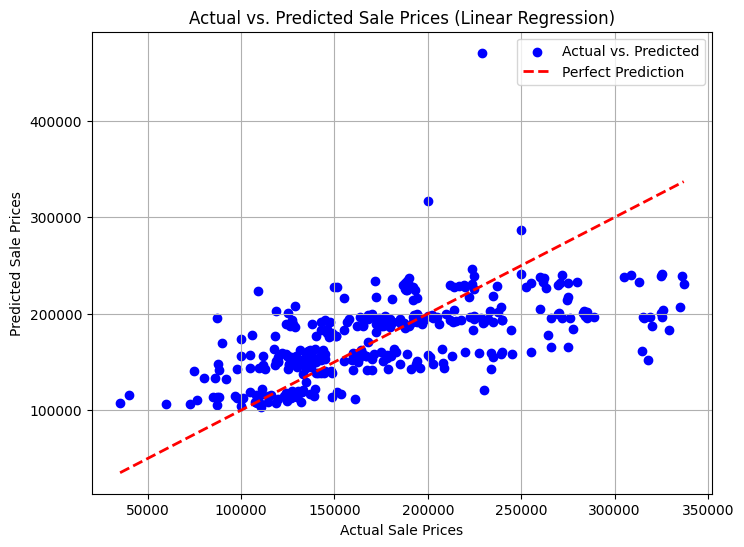

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred, color='blue', marker='o', label='Actual vs. Predicted')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.title('Actual vs. Predicted Sale Prices (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()

**Log Transformation of Sale Prices**

Applying a logarithmic transformation to the "SalePrice" to reduce skewness and improve model performance.

In [ ]:
house_data_filtered['LogSalePrice'] = np.log(house_data_filtered['SalePrice'])

**New Y-feature**

In [ ]:
new_y = house_data_filtered['LogSalePrice']

In [ ]:
new_y

,LogSalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1455,12.072541
1456,12.254863
1457,12.493130
1458,11.864462


**Split the new data**

In [ ]:
new_X_train, new_X_test, new_Y_train, new_Y_test = train_test_split(X, new_y, test_size=0.25, random_state=0)

**Feature scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
new_X_train = sc.fit_transform(new_X_train)
new_X_test = sc.transform(new_X_test)

**Training the Model with Log-Transformed Sale Prices**

Training a new linear regression model using the log-transformed sale prices as the target variable.

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(new_X_train,new_Y_train)

LinearRegression()

**Model Evaluation Using Log-Transformed Sale Prices**

Calculating evaluation metrics for the model trained on log-transformed sale prices.

In [ ]:
new_y_pred = regressor.predict(new_X_test)

**Sale_Price=WX+b**

**Where:**

W = [0.072  0.201 0.023]

X is the input parameters

b = 11.972


In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[0.0728394  0.20099604 0.02311631]
11.971924509136697


In [ ]:
new_mse = mean_squared_error(new_Y_test, new_y_pred)
new_rmse = np.sqrt(new_mse)
new_mae = mean_absolute_error(new_Y_test, new_y_pred)
new_r2 = r2_score(new_Y_test, new_y_pred)

print(f"Mean Squared Error (MSE): {new_mse}")
print(f"Root Mean Squared Error (RMSE): {new_rmse}")
print(f"Mean Absolute Error (MAE): {new_mae}")
print(f"R² Score: {new_r2}")

Mean Squared Error (MSE): 0.07790640646788938
Root Mean Squared Error (RMSE): 0.27911719127973716
Mean Absolute Error (MAE): 0.2075177402714972
R² Score: 0.3835306008111474


**Comparing Actual vs. Predicted Sale Prices (Original Scale)**

Visualizing the model's predictions after transforming them back to the original scale (exponential transformation).

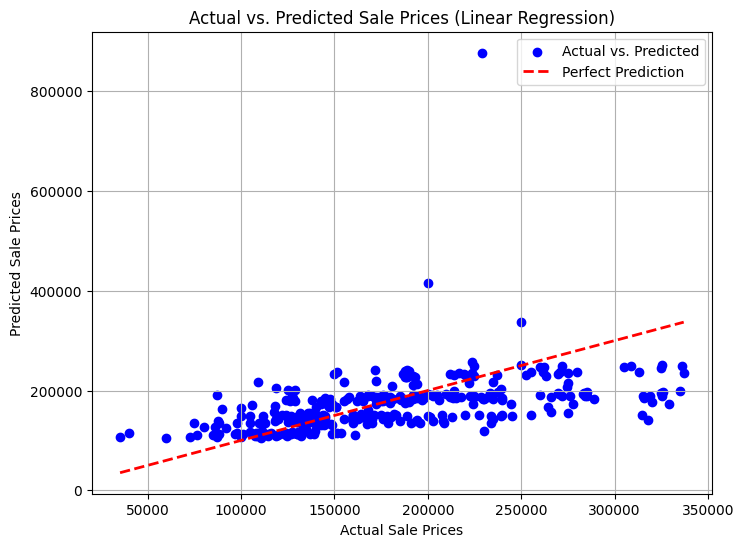

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(np.exp(new_Y_test), np.exp(new_y_pred), color='blue', marker='o', label='Actual vs. Predicted')
plt.plot([min(np.exp(new_Y_test)), max(np.exp(new_Y_test))], [min(np.exp(new_Y_test)), max(np.exp(new_Y_test))], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.title('Actual vs. Predicted Sale Prices (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()

**Sample Comparison of Actual and Predicted Prices**

Displaying a few random samples from the dataset to compare actual sale prices with the model's predictions.

In [ ]:
y_pred_original_scale = np.exp(new_y_pred)


new_comparison_df = pd.DataFrame({'Actual': np.exp(new_Y_test), 'Predicted': y_pred_original_scale})

In [ ]:
new_random_samples = new_comparison_df.sample(2)
print(new_random_samples)

        Actual      Predicted
1066  178000.0  180623.056522
447   199900.0  192780.072760


##**Conclusion:**

###**Prediction Accuracy Improvement:**

After applying the log transformation, the points appear to be closer to the perfect prediction line (red dashed line), indicating a slight improvement in prediction accuracy. The model shows a better fit for the lower and mid-range sale prices, with reduced variability in predictions.

###**Handling Outliers:**

Before the log transformation, the plot showed some extreme outliers with large deviations, especially in higher sale prices. After the log transformation, these extreme values are better managed, and fewer points deviate significantly from the line, indicating that the transformation helped to stabilize the variance and handle skewness in the data.

###**Spread of Predictions:**

The spread of predicted sale prices is reduced after applying the log transformation. The model's predictions for higher sale prices are less scattered compared to the original scale, demonstrating that the transformation helped in dealing with the heteroscedasticity (non-constant variance) present in the original data.

###**Improved Linearity:**

The relationship between the actual and predicted sale prices appears more linear after the log transformation, suggesting that the transformation helped to achieve a more linear fit for the model. This is evident in the improved alignment of points along the red dashed line.
Overall, the log transformation enhanced the model's predictive performance by managing outliers, reducing variance, and improving linearity. This results in more reliable and consistent predictions for house prices across various ranges.

